In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Часть I: О теореме Байеса

### 1.
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Ответ:
* А - редкая группа крови у подсудимого
* B - подсудимый виновен

Прокурор оценил $P(A | \overline B)$, а должен был $P(B | A) = \frac{P(B)P(A | B)}{P(A)}$

Он заявил, что $P(A | \overline B)=0.01$ - у подсудимого именно такая группа крови, если он невиновен 

а значит $P(\overline A | \overline B)=0.99$ - предлагаю осудить

поближе рассмотрим $P(B | A)$:

заметим, что $P(A | B)=1$

$$P(B | A) = \frac{P(B)P(A | B)}{P(B)P(A | B) + P(A | \overline B)P(\overline B)} = \frac{P(B)}{P(B) + 0.01(1 - P(B))}$$

где P(B) - арприорная вероятность того, что подозреваемый убийца 

Попробуем повизуализировать постериорную вероятность при некоторых значениях априорной

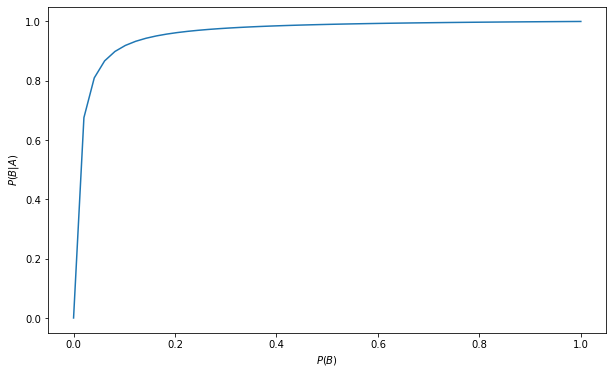

In [5]:
def get_posterior(p_b):
    return p_b / ( 0.99 * p_b + .01)

p_b = np.linspace(0, 1, 50)
plt.figure(figsize=(10, 6))
plt.plot(p_b, get_posterior(p_b))
plt.xlabel('$P(B)$')
plt.ylabel('$P(B|A)$')
plt.show()

к слову при $P(B)=0.5$, $P(B|A)=$

In [6]:
print(f"к слову при P(B)=0.5, P(B|A)={get_posterior(.5):.3}")

к слову при P(B)=0.5, P(B|A)=0.99


## 2.
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


#### Ответ:

In [7]:
get_posterior(.01)

0.5025125628140703

он указал априорную вероятность, но даже при такой крохотной вероятности условие делает априорную достаточно большой

похоже, что юрист и сам не разбирается или же очень хорошо делает свою работу

### 3.
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


#### Ответ:

* A - положительный тест
* B - болен

In [8]:
def get_posterior_proba1(fp, fn): # P(B|A)
    return 0.01 * (1 - fn) / (0.01 * (1 - fn) + 0.99 * fp)

def get_posterior_proba2(fp, fn): # P(B|-A)
    return 0.01 * fn / (0.01 * fn + 0.99 * (1 - fp))

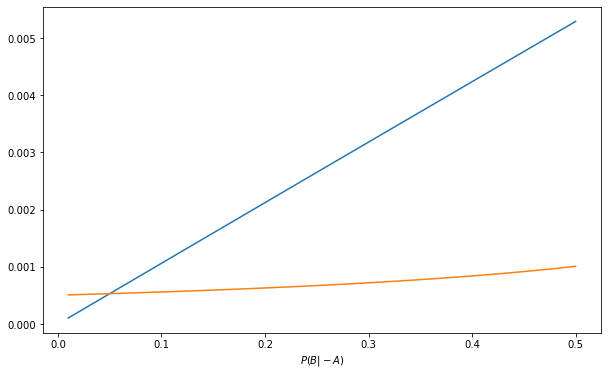

In [26]:
errors = np.linspace(0.01, 0.5, 100)
plt.figure(figsize=(10,6))
#plt.subplot(1, 2, 1)
proba = get_posterior_proba2(0.05, errors)
plt.plot(errors, proba)
#plt.subplot(1, 2, 2)
proba = get_posterior_proba2(errors, 0.05)
plt.plot(errors, proba)
plt.xlabel("$P(B|-A)$")
plt.show()

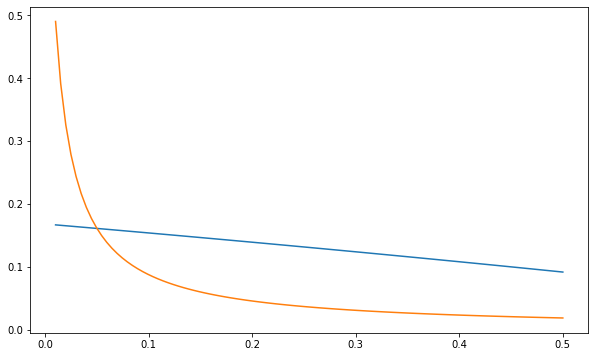

In [27]:
plt.figure(figsize=(10,6))
#plt.subplot(1, 2, 1)
proba = get_posterior_proba1(0.05, errors)
plt.plot(errors, proba)
#plt.subplot(1, 2, 2)
proba = get_posterior_proba1(errors, 0.05)
plt.plot(errors, proba)
plt.show()

* $P(A | \overline B) - fp$
* $P(\overline A | B) - fn$

* $P(\overline A | \overline B) = 1 - P(A | \overline B)$
* $P( A |  B) = 1 - P(\overline A | B)$

$$P(B | A) = \frac{P(B)P(A|B)}{P(A)}=\frac{0.01(1-fn)}{0.01(1-fn)+0.99fp}$$

$$P(B | \overline A)=\frac{P(B)(\overline A | B)}{P(\overline A)}=\frac{0.01fn}{0.01fn+0.99(1-fp)}$$